Using Twitter Sentiment Analysis to predict Stock Prices for year 2018.

In [1]:
!python get_twitter_data.py #2018 average sentiment scores for 5 tweets per day
# -1 <= sentiment score <= 1 , the more  negative indicates a bad tweet
# Use tesla stock as an example

Preprocessing
-  Merge the sentiment score with the corresponding closing stock price
-  Normalize data to have the same scale

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import datetime as dt
df=pd.read_csv('./data/sentiment_series.csv')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31) #.now()
df_prices = web.DataReader("TSLA", 'yahoo', start, end)
df_prices.reset_index(inplace=True)
df_prices=df_prices[['Date', 'Adj Close']]
data = df_prices.merge(df,on=['Date','Date'])
data.head(2)

,Date,Adj Close,sentiment
0,2018-01-02,320.529999,0.313106
1,2018-01-03,317.250000,0.218333


In [3]:
stats=data.describe().transpose()
mean_prices = stats['mean'][0]
std_prices = stats['std'][0]
mean_sentiment = stats['mean'][1]
std_sentiment = stats['mean'][1]

In [4]:
data['Adj Close'] = (data['Adj Close'] - mean_prices) / std_prices
data['sentiment'] = (data['sentiment'] - mean_sentiment) / std_sentiment

Exploratory Data Analysis

- range of values of Closing prices compared to sentiment score is very big (might need to normalize data or apply a log transformation)
- No missing values
- Moving average shows trend of stock prices

In [5]:
data.describe()
data['5MA_sentiment'] = data['sentiment'].rolling(window=5).mean()
data['5MA_sentiment'].fillna(data['sentiment'], inplace=True)

In [6]:
import matplotlib.pyplot as plt
# plt.plot(data['sentiment'].values, label='Sentiment score series')
plt.plot((data['Adj Close'].values))
plt.plot(data['5MA_sentiment'].values)
# plt.ylabel('')
plt.legend(['Adj Close','5 moving avg'])
plt.show()

In [7]:
data['Date_str'] = data['Date'].astype(str)
data['Month'] = data['Date_str'].apply(lambda x: x.split('-')[1]).astype(int)
data['Day'] = data['Date_str'].apply(lambda x:x.split('-')[2]).astype(int)
data.drop('Date_str', axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
# split into train test and val (Training: Jan-October, Test: October-December)
split_date = pd.datetime(2018,10,1)
df_training = data.loc[data['Date'] <= split_date]
df_test = data.loc[data['Date'] > split_date]
# df_training['Date'] = df_training['Date'].map(dt.datetime.toordinal)
# # df_test['Date'] = df_test['Date'].map(dt.datetime.toordinal)
# df_training['Date'] = df_training['Date'].astype(float)
# df_test['Date'] = df_test['Date'].astype('float')

In [9]:
x_train = df_training[['5MA_sentiment', 'Month', 'Day']]
y_train = df_training['Adj Close']
x_test = df_test[['5MA_sentiment', 'Month', 'Day']]
y_test = df_test['Adj Close']

In [10]:
x_train.head()

,5MA_sentiment,Month,Day
0,3.475756,1,2
1,2.121009,1,3
2,2.437081,1,4
3,-2.429470,1,5
4,1.464074,1,8


Modeling

- Set up models
- Tune hyperparameters
- Compare results of validation errors
- Predictors: Day, Month, Moving Average Sentiment Score 
- Response: Stock Price

Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=20000,
                            criterion='mse', verbose=2)
model.fit(x_train, y_train)
prediction=model.predict(x_test)

building tree 1 of 20000
building tree 2 of 20000
building tree 3 of 20000
building tree 4 of 20000
building tree 5 of 20000
building tree 6 of 20000
building tree 7 of 20000
building tree 8 of 20000
building tree 9 of 20000
building tree 10 of 20000
building tree 11 of 20000
building tree 12 of 20000
building tree 13 of 20000
building tree 14 of 20000
building tree 15 of 20000
building tree 16 of 20000
building tree 17 of 20000
building tree 18 of 20000
building tree 19 of 20000
building tree 20 of 20000
building tree 21 of 20000
building tree 22 of 20000
building tree 23 of 20000
building tree 24 of 20000
building tree 25 of 20000
building tree 26 of 20000
building tree 27 of 20000
building tree 28 of 20000
building tree 29 of 20000
building tree 30 of 20000
building tree 31 of 20000
building tree 32 of 20000
building tree 33 of 20000
building tree 34 of 20000
building tree 35 of 20000
building tree 36 of 20000
building tree 37 of 20000
building tree 38 of 20000
building tree 39 of 2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 128 of 20000
building tree 129 of 20000
building tree 130 of 20000
building tree 131 of 20000
building tree 132 of 20000
building tree 133 of 20000
building tree 134 of 20000
building tree 135 of 20000
building tree 136 of 20000
building tree 137 of 20000
building tree 138 of 20000
building tree 139 of 20000
building tree 140 of 20000
building tree 141 of 20000
building tree 142 of 20000
building tree 143 of 20000
building tree 144 of 20000
building tree 145 of 20000
building tree 146 of 20000
building tree 147 of 20000
building tree 148 of 20000
building tree 149 of 20000
building tree 150 of 20000
building tree 151 of 20000
building tree 152 of 20000
building tree 153 of 20000
building tree 154 of 20000
building tree 155 of 20000
building tree 156 of 20000
building tree 157 of 20000
building tree 158 of 20000
building tree 159 of 20000
building tree 160 of 20000
building tree 161 of 20000
building tree 162 of 20000
building tree 163 of 20000
building tree 164 of 20000
b

building tree 544 of 20000
building tree 545 of 20000
building tree 546 of 20000
building tree 547 of 20000
building tree 548 of 20000
building tree 549 of 20000
building tree 550 of 20000
building tree 551 of 20000
building tree 552 of 20000
building tree 553 of 20000
building tree 554 of 20000
building tree 555 of 20000
building tree 556 of 20000
building tree 557 of 20000
building tree 558 of 20000
building tree 559 of 20000
building tree 560 of 20000
building tree 561 of 20000
building tree 562 of 20000
building tree 563 of 20000
building tree 564 of 20000
building tree 565 of 20000
building tree 566 of 20000
building tree 567 of 20000
building tree 568 of 20000
building tree 569 of 20000
building tree 570 of 20000
building tree 571 of 20000
building tree 572 of 20000
building tree 573 of 20000
building tree 574 of 20000
building tree 575 of 20000
building tree 576 of 20000
building tree 577 of 20000
building tree 578 of 20000
building tree 579 of 20000
building tree 580 of 20000
b

building tree 984 of 20000
building tree 985 of 20000
building tree 986 of 20000
building tree 987 of 20000
building tree 988 of 20000
building tree 989 of 20000
building tree 990 of 20000
building tree 991 of 20000
building tree 992 of 20000
building tree 993 of 20000
building tree 994 of 20000
building tree 995 of 20000
building tree 996 of 20000
building tree 997 of 20000
building tree 998 of 20000
building tree 999 of 20000
building tree 1000 of 20000
building tree 1001 of 20000
building tree 1002 of 20000
building tree 1003 of 20000
building tree 1004 of 20000
building tree 1005 of 20000
building tree 1006 of 20000
building tree 1007 of 20000
building tree 1008 of 20000
building tree 1009 of 20000
building tree 1010 of 20000
building tree 1011 of 20000
building tree 1012 of 20000
building tree 1013 of 20000
building tree 1014 of 20000
building tree 1015 of 20000
building tree 1016 of 20000
building tree 1017 of 20000
building tree 1018 of 20000
building tree 1019 of 20000
building

building tree 1305 of 20000
building tree 1306 of 20000
building tree 1307 of 20000
building tree 1308 of 20000
building tree 1309 of 20000
building tree 1310 of 20000
building tree 1311 of 20000
building tree 1312 of 20000
building tree 1313 of 20000
building tree 1314 of 20000
building tree 1315 of 20000
building tree 1316 of 20000
building tree 1317 of 20000
building tree 1318 of 20000
building tree 1319 of 20000
building tree 1320 of 20000
building tree 1321 of 20000
building tree 1322 of 20000
building tree 1323 of 20000
building tree 1324 of 20000
building tree 1325 of 20000
building tree 1326 of 20000
building tree 1327 of 20000
building tree 1328 of 20000
building tree 1329 of 20000
building tree 1330 of 20000
building tree 1331 of 20000
building tree 1332 of 20000
building tree 1333 of 20000
building tree 1334 of 20000
building tree 1335 of 20000
building tree 1336 of 20000
building tree 1337 of 20000
building tree 1338 of 20000
building tree 1339 of 20000
building tree 1340 o

building tree 1635 of 20000
building tree 1636 of 20000
building tree 1637 of 20000
building tree 1638 of 20000
building tree 1639 of 20000
building tree 1640 of 20000
building tree 1641 of 20000
building tree 1642 of 20000
building tree 1643 of 20000
building tree 1644 of 20000
building tree 1645 of 20000
building tree 1646 of 20000
building tree 1647 of 20000
building tree 1648 of 20000
building tree 1649 of 20000
building tree 1650 of 20000
building tree 1651 of 20000
building tree 1652 of 20000
building tree 1653 of 20000
building tree 1654 of 20000
building tree 1655 of 20000
building tree 1656 of 20000
building tree 1657 of 20000
building tree 1658 of 20000
building tree 1659 of 20000
building tree 1660 of 20000
building tree 1661 of 20000
building tree 1662 of 20000
building tree 1663 of 20000
building tree 1664 of 20000
building tree 1665 of 20000
building tree 1666 of 20000
building tree 1667 of 20000
building tree 1668 of 20000
building tree 1669 of 20000
building tree 1670 o

building tree 1994 of 20000
building tree 1995 of 20000
building tree 1996 of 20000
building tree 1997 of 20000
building tree 1998 of 20000
building tree 1999 of 20000
building tree 2000 of 20000
building tree 2001 of 20000
building tree 2002 of 20000
building tree 2003 of 20000
building tree 2004 of 20000
building tree 2005 of 20000
building tree 2006 of 20000
building tree 2007 of 20000
building tree 2008 of 20000
building tree 2009 of 20000
building tree 2010 of 20000
building tree 2011 of 20000
building tree 2012 of 20000
building tree 2013 of 20000
building tree 2014 of 20000
building tree 2015 of 20000
building tree 2016 of 20000
building tree 2017 of 20000
building tree 2018 of 20000
building tree 2019 of 20000
building tree 2020 of 20000
building tree 2021 of 20000
building tree 2022 of 20000
building tree 2023 of 20000
building tree 2024 of 20000
building tree 2025 of 20000
building tree 2026 of 20000
building tree 2027 of 20000
building tree 2028 of 20000
building tree 2029 o

building tree 2355 of 20000
building tree 2356 of 20000
building tree 2357 of 20000
building tree 2358 of 20000
building tree 2359 of 20000
building tree 2360 of 20000
building tree 2361 of 20000
building tree 2362 of 20000
building tree 2363 of 20000
building tree 2364 of 20000
building tree 2365 of 20000
building tree 2366 of 20000
building tree 2367 of 20000
building tree 2368 of 20000
building tree 2369 of 20000
building tree 2370 of 20000
building tree 2371 of 20000
building tree 2372 of 20000
building tree 2373 of 20000
building tree 2374 of 20000
building tree 2375 of 20000
building tree 2376 of 20000
building tree 2377 of 20000
building tree 2378 of 20000
building tree 2379 of 20000
building tree 2380 of 20000
building tree 2381 of 20000
building tree 2382 of 20000
building tree 2383 of 20000
building tree 2384 of 20000
building tree 2385 of 20000
building tree 2386 of 20000
building tree 2387 of 20000
building tree 2388 of 20000
building tree 2389 of 20000
building tree 2390 o

building tree 2694 of 20000
building tree 2695 of 20000
building tree 2696 of 20000
building tree 2697 of 20000
building tree 2698 of 20000
building tree 2699 of 20000
building tree 2700 of 20000
building tree 2701 of 20000
building tree 2702 of 20000
building tree 2703 of 20000
building tree 2704 of 20000
building tree 2705 of 20000
building tree 2706 of 20000
building tree 2707 of 20000
building tree 2708 of 20000
building tree 2709 of 20000
building tree 2710 of 20000
building tree 2711 of 20000
building tree 2712 of 20000
building tree 2713 of 20000
building tree 2714 of 20000
building tree 2715 of 20000
building tree 2716 of 20000
building tree 2717 of 20000
building tree 2718 of 20000
building tree 2719 of 20000
building tree 2720 of 20000
building tree 2721 of 20000
building tree 2722 of 20000
building tree 2723 of 20000
building tree 2724 of 20000
building tree 2725 of 20000
building tree 2726 of 20000
building tree 2727 of 20000
building tree 2728 of 20000
building tree 2729 o

building tree 3009 of 20000
building tree 3010 of 20000
building tree 3011 of 20000
building tree 3012 of 20000
building tree 3013 of 20000
building tree 3014 of 20000
building tree 3015 of 20000
building tree 3016 of 20000
building tree 3017 of 20000
building tree 3018 of 20000
building tree 3019 of 20000
building tree 3020 of 20000
building tree 3021 of 20000
building tree 3022 of 20000
building tree 3023 of 20000
building tree 3024 of 20000
building tree 3025 of 20000
building tree 3026 of 20000
building tree 3027 of 20000
building tree 3028 of 20000
building tree 3029 of 20000
building tree 3030 of 20000
building tree 3031 of 20000
building tree 3032 of 20000
building tree 3033 of 20000
building tree 3034 of 20000
building tree 3035 of 20000
building tree 3036 of 20000
building tree 3037 of 20000
building tree 3038 of 20000
building tree 3039 of 20000
building tree 3040 of 20000
building tree 3041 of 20000
building tree 3042 of 20000
building tree 3043 of 20000
building tree 3044 o

building tree 3344 of 20000
building tree 3345 of 20000
building tree 3346 of 20000
building tree 3347 of 20000
building tree 3348 of 20000
building tree 3349 of 20000
building tree 3350 of 20000
building tree 3351 of 20000
building tree 3352 of 20000
building tree 3353 of 20000
building tree 3354 of 20000
building tree 3355 of 20000
building tree 3356 of 20000
building tree 3357 of 20000
building tree 3358 of 20000
building tree 3359 of 20000
building tree 3360 of 20000
building tree 3361 of 20000
building tree 3362 of 20000
building tree 3363 of 20000
building tree 3364 of 20000
building tree 3365 of 20000
building tree 3366 of 20000
building tree 3367 of 20000
building tree 3368 of 20000
building tree 3369 of 20000
building tree 3370 of 20000
building tree 3371 of 20000
building tree 3372 of 20000
building tree 3373 of 20000
building tree 3374 of 20000
building tree 3375 of 20000
building tree 3376 of 20000
building tree 3377 of 20000
building tree 3378 of 20000
building tree 3379 o

building tree 3650 of 20000
building tree 3651 of 20000
building tree 3652 of 20000
building tree 3653 of 20000
building tree 3654 of 20000
building tree 3655 of 20000
building tree 3656 of 20000
building tree 3657 of 20000
building tree 3658 of 20000
building tree 3659 of 20000
building tree 3660 of 20000
building tree 3661 of 20000
building tree 3662 of 20000
building tree 3663 of 20000
building tree 3664 of 20000
building tree 3665 of 20000
building tree 3666 of 20000
building tree 3667 of 20000
building tree 3668 of 20000
building tree 3669 of 20000
building tree 3670 of 20000
building tree 3671 of 20000
building tree 3672 of 20000
building tree 3673 of 20000
building tree 3674 of 20000
building tree 3675 of 20000
building tree 3676 of 20000
building tree 3677 of 20000
building tree 3678 of 20000
building tree 3679 of 20000
building tree 3680 of 20000
building tree 3681 of 20000
building tree 3682 of 20000
building tree 3683 of 20000
building tree 3684 of 20000
building tree 3685 o

building tree 4005 of 20000
building tree 4006 of 20000
building tree 4007 of 20000
building tree 4008 of 20000
building tree 4009 of 20000
building tree 4010 of 20000
building tree 4011 of 20000
building tree 4012 of 20000
building tree 4013 of 20000
building tree 4014 of 20000
building tree 4015 of 20000
building tree 4016 of 20000
building tree 4017 of 20000
building tree 4018 of 20000
building tree 4019 of 20000
building tree 4020 of 20000
building tree 4021 of 20000
building tree 4022 of 20000
building tree 4023 of 20000
building tree 4024 of 20000
building tree 4025 of 20000
building tree 4026 of 20000
building tree 4027 of 20000
building tree 4028 of 20000
building tree 4029 of 20000
building tree 4030 of 20000
building tree 4031 of 20000
building tree 4032 of 20000
building tree 4033 of 20000
building tree 4034 of 20000
building tree 4035 of 20000
building tree 4036 of 20000
building tree 4037 of 20000
building tree 4038 of 20000
building tree 4039 of 20000
building tree 4040 o

building tree 4358 of 20000
building tree 4359 of 20000
building tree 4360 of 20000
building tree 4361 of 20000
building tree 4362 of 20000
building tree 4363 of 20000
building tree 4364 of 20000
building tree 4365 of 20000
building tree 4366 of 20000
building tree 4367 of 20000
building tree 4368 of 20000
building tree 4369 of 20000
building tree 4370 of 20000
building tree 4371 of 20000
building tree 4372 of 20000
building tree 4373 of 20000
building tree 4374 of 20000
building tree 4375 of 20000
building tree 4376 of 20000
building tree 4377 of 20000
building tree 4378 of 20000
building tree 4379 of 20000
building tree 4380 of 20000
building tree 4381 of 20000
building tree 4382 of 20000
building tree 4383 of 20000
building tree 4384 of 20000
building tree 4385 of 20000
building tree 4386 of 20000
building tree 4387 of 20000
building tree 4388 of 20000
building tree 4389 of 20000
building tree 4390 of 20000
building tree 4391 of 20000
building tree 4392 of 20000
building tree 4393 o

building tree 4662 of 20000
building tree 4663 of 20000
building tree 4664 of 20000
building tree 4665 of 20000
building tree 4666 of 20000
building tree 4667 of 20000
building tree 4668 of 20000
building tree 4669 of 20000
building tree 4670 of 20000
building tree 4671 of 20000
building tree 4672 of 20000
building tree 4673 of 20000
building tree 4674 of 20000
building tree 4675 of 20000
building tree 4676 of 20000
building tree 4677 of 20000
building tree 4678 of 20000
building tree 4679 of 20000
building tree 4680 of 20000
building tree 4681 of 20000
building tree 4682 of 20000
building tree 4683 of 20000
building tree 4684 of 20000
building tree 4685 of 20000
building tree 4686 of 20000
building tree 4687 of 20000
building tree 4688 of 20000
building tree 4689 of 20000
building tree 4690 of 20000
building tree 4691 of 20000
building tree 4692 of 20000
building tree 4693 of 20000
building tree 4694 of 20000
building tree 4695 of 20000
building tree 4696 of 20000
building tree 4697 o

building tree 5061 of 20000
building tree 5062 of 20000
building tree 5063 of 20000
building tree 5064 of 20000
building tree 5065 of 20000
building tree 5066 of 20000
building tree 5067 of 20000
building tree 5068 of 20000
building tree 5069 of 20000
building tree 5070 of 20000
building tree 5071 of 20000
building tree 5072 of 20000
building tree 5073 of 20000
building tree 5074 of 20000
building tree 5075 of 20000
building tree 5076 of 20000
building tree 5077 of 20000
building tree 5078 of 20000
building tree 5079 of 20000
building tree 5080 of 20000
building tree 5081 of 20000
building tree 5082 of 20000
building tree 5083 of 20000
building tree 5084 of 20000
building tree 5085 of 20000
building tree 5086 of 20000
building tree 5087 of 20000
building tree 5088 of 20000
building tree 5089 of 20000
building tree 5090 of 20000
building tree 5091 of 20000
building tree 5092 of 20000
building tree 5093 of 20000
building tree 5094 of 20000
building tree 5095 of 20000
building tree 5096 o

building tree 5514 of 20000
building tree 5515 of 20000
building tree 5516 of 20000
building tree 5517 of 20000
building tree 5518 of 20000
building tree 5519 of 20000
building tree 5520 of 20000
building tree 5521 of 20000
building tree 5522 of 20000
building tree 5523 of 20000
building tree 5524 of 20000
building tree 5525 of 20000
building tree 5526 of 20000
building tree 5527 of 20000
building tree 5528 of 20000
building tree 5529 of 20000
building tree 5530 of 20000
building tree 5531 of 20000
building tree 5532 of 20000
building tree 5533 of 20000
building tree 5534 of 20000
building tree 5535 of 20000
building tree 5536 of 20000
building tree 5537 of 20000
building tree 5538 of 20000
building tree 5539 of 20000
building tree 5540 of 20000
building tree 5541 of 20000
building tree 5542 of 20000
building tree 5543 of 20000
building tree 5544 of 20000
building tree 5545 of 20000
building tree 5546 of 20000
building tree 5547 of 20000
building tree 5548 of 20000
building tree 5549 o

building tree 5952 of 20000
building tree 5953 of 20000
building tree 5954 of 20000
building tree 5955 of 20000
building tree 5956 of 20000
building tree 5957 of 20000
building tree 5958 of 20000
building tree 5959 of 20000
building tree 5960 of 20000
building tree 5961 of 20000
building tree 5962 of 20000
building tree 5963 of 20000
building tree 5964 of 20000
building tree 5965 of 20000
building tree 5966 of 20000
building tree 5967 of 20000
building tree 5968 of 20000
building tree 5969 of 20000
building tree 5970 of 20000
building tree 5971 of 20000
building tree 5972 of 20000
building tree 5973 of 20000
building tree 5974 of 20000
building tree 5975 of 20000
building tree 5976 of 20000
building tree 5977 of 20000
building tree 5978 of 20000
building tree 5979 of 20000
building tree 5980 of 20000
building tree 5981 of 20000
building tree 5982 of 20000
building tree 5983 of 20000
building tree 5984 of 20000
building tree 5985 of 20000
building tree 5986 of 20000
building tree 5987 o

building tree 6254 of 20000
building tree 6255 of 20000
building tree 6256 of 20000
building tree 6257 of 20000
building tree 6258 of 20000
building tree 6259 of 20000
building tree 6260 of 20000
building tree 6261 of 20000
building tree 6262 of 20000
building tree 6263 of 20000
building tree 6264 of 20000
building tree 6265 of 20000
building tree 6266 of 20000
building tree 6267 of 20000
building tree 6268 of 20000
building tree 6269 of 20000
building tree 6270 of 20000
building tree 6271 of 20000
building tree 6272 of 20000
building tree 6273 of 20000
building tree 6274 of 20000
building tree 6275 of 20000
building tree 6276 of 20000
building tree 6277 of 20000
building tree 6278 of 20000
building tree 6279 of 20000
building tree 6280 of 20000
building tree 6281 of 20000
building tree 6282 of 20000
building tree 6283 of 20000
building tree 6284 of 20000
building tree 6285 of 20000
building tree 6286 of 20000
building tree 6287 of 20000
building tree 6288 of 20000
building tree 6289 o

building tree 6692 of 20000
building tree 6693 of 20000
building tree 6694 of 20000
building tree 6695 of 20000
building tree 6696 of 20000
building tree 6697 of 20000
building tree 6698 of 20000
building tree 6699 of 20000
building tree 6700 of 20000
building tree 6701 of 20000
building tree 6702 of 20000
building tree 6703 of 20000
building tree 6704 of 20000
building tree 6705 of 20000
building tree 6706 of 20000
building tree 6707 of 20000
building tree 6708 of 20000
building tree 6709 of 20000
building tree 6710 of 20000
building tree 6711 of 20000
building tree 6712 of 20000
building tree 6713 of 20000
building tree 6714 of 20000
building tree 6715 of 20000
building tree 6716 of 20000
building tree 6717 of 20000
building tree 6718 of 20000
building tree 6719 of 20000
building tree 6720 of 20000
building tree 6721 of 20000
building tree 6722 of 20000
building tree 6723 of 20000
building tree 6724 of 20000
building tree 6725 of 20000
building tree 6726 of 20000
building tree 6727 o

building tree 7003 of 20000
building tree 7004 of 20000
building tree 7005 of 20000
building tree 7006 of 20000
building tree 7007 of 20000
building tree 7008 of 20000
building tree 7009 of 20000
building tree 7010 of 20000
building tree 7011 of 20000
building tree 7012 of 20000
building tree 7013 of 20000
building tree 7014 of 20000
building tree 7015 of 20000
building tree 7016 of 20000
building tree 7017 of 20000
building tree 7018 of 20000
building tree 7019 of 20000
building tree 7020 of 20000
building tree 7021 of 20000
building tree 7022 of 20000
building tree 7023 of 20000
building tree 7024 of 20000
building tree 7025 of 20000
building tree 7026 of 20000
building tree 7027 of 20000
building tree 7028 of 20000
building tree 7029 of 20000
building tree 7030 of 20000
building tree 7031 of 20000
building tree 7032 of 20000
building tree 7033 of 20000
building tree 7034 of 20000
building tree 7035 of 20000
building tree 7036 of 20000
building tree 7037 of 20000
building tree 7038 o

building tree 7351 of 20000
building tree 7352 of 20000
building tree 7353 of 20000
building tree 7354 of 20000
building tree 7355 of 20000
building tree 7356 of 20000
building tree 7357 of 20000
building tree 7358 of 20000
building tree 7359 of 20000
building tree 7360 of 20000
building tree 7361 of 20000
building tree 7362 of 20000
building tree 7363 of 20000
building tree 7364 of 20000
building tree 7365 of 20000
building tree 7366 of 20000
building tree 7367 of 20000
building tree 7368 of 20000
building tree 7369 of 20000
building tree 7370 of 20000
building tree 7371 of 20000
building tree 7372 of 20000
building tree 7373 of 20000
building tree 7374 of 20000
building tree 7375 of 20000
building tree 7376 of 20000
building tree 7377 of 20000
building tree 7378 of 20000
building tree 7379 of 20000
building tree 7380 of 20000
building tree 7381 of 20000
building tree 7382 of 20000
building tree 7383 of 20000
building tree 7384 of 20000
building tree 7385 of 20000
building tree 7386 o

building tree 7703 of 20000
building tree 7704 of 20000
building tree 7705 of 20000
building tree 7706 of 20000
building tree 7707 of 20000
building tree 7708 of 20000
building tree 7709 of 20000
building tree 7710 of 20000
building tree 7711 of 20000
building tree 7712 of 20000
building tree 7713 of 20000
building tree 7714 of 20000
building tree 7715 of 20000
building tree 7716 of 20000
building tree 7717 of 20000
building tree 7718 of 20000
building tree 7719 of 20000
building tree 7720 of 20000
building tree 7721 of 20000
building tree 7722 of 20000
building tree 7723 of 20000
building tree 7724 of 20000
building tree 7725 of 20000
building tree 7726 of 20000
building tree 7727 of 20000
building tree 7728 of 20000
building tree 7729 of 20000
building tree 7730 of 20000
building tree 7731 of 20000
building tree 7732 of 20000
building tree 7733 of 20000
building tree 7734 of 20000
building tree 7735 of 20000
building tree 7736 of 20000
building tree 7737 of 20000
building tree 7738 o

building tree 8079 of 20000
building tree 8080 of 20000
building tree 8081 of 20000
building tree 8082 of 20000
building tree 8083 of 20000
building tree 8084 of 20000
building tree 8085 of 20000
building tree 8086 of 20000
building tree 8087 of 20000
building tree 8088 of 20000
building tree 8089 of 20000
building tree 8090 of 20000
building tree 8091 of 20000
building tree 8092 of 20000
building tree 8093 of 20000
building tree 8094 of 20000
building tree 8095 of 20000
building tree 8096 of 20000
building tree 8097 of 20000
building tree 8098 of 20000
building tree 8099 of 20000
building tree 8100 of 20000
building tree 8101 of 20000
building tree 8102 of 20000
building tree 8103 of 20000
building tree 8104 of 20000
building tree 8105 of 20000
building tree 8106 of 20000
building tree 8107 of 20000
building tree 8108 of 20000
building tree 8109 of 20000
building tree 8110 of 20000
building tree 8111 of 20000
building tree 8112 of 20000
building tree 8113 of 20000
building tree 8114 o

building tree 8502 of 20000
building tree 8503 of 20000
building tree 8504 of 20000
building tree 8505 of 20000
building tree 8506 of 20000
building tree 8507 of 20000
building tree 8508 of 20000
building tree 8509 of 20000
building tree 8510 of 20000
building tree 8511 of 20000
building tree 8512 of 20000
building tree 8513 of 20000
building tree 8514 of 20000
building tree 8515 of 20000
building tree 8516 of 20000
building tree 8517 of 20000
building tree 8518 of 20000
building tree 8519 of 20000
building tree 8520 of 20000
building tree 8521 of 20000
building tree 8522 of 20000
building tree 8523 of 20000
building tree 8524 of 20000
building tree 8525 of 20000
building tree 8526 of 20000
building tree 8527 of 20000
building tree 8528 of 20000
building tree 8529 of 20000
building tree 8530 of 20000
building tree 8531 of 20000
building tree 8532 of 20000
building tree 8533 of 20000
building tree 8534 of 20000
building tree 8535 of 20000
building tree 8536 of 20000
building tree 8537 o

building tree 8841 of 20000
building tree 8842 of 20000
building tree 8843 of 20000
building tree 8844 of 20000
building tree 8845 of 20000
building tree 8846 of 20000
building tree 8847 of 20000
building tree 8848 of 20000
building tree 8849 of 20000
building tree 8850 of 20000
building tree 8851 of 20000
building tree 8852 of 20000
building tree 8853 of 20000
building tree 8854 of 20000
building tree 8855 of 20000
building tree 8856 of 20000
building tree 8857 of 20000
building tree 8858 of 20000
building tree 8859 of 20000
building tree 8860 of 20000
building tree 8861 of 20000
building tree 8862 of 20000
building tree 8863 of 20000
building tree 8864 of 20000
building tree 8865 of 20000
building tree 8866 of 20000
building tree 8867 of 20000
building tree 8868 of 20000
building tree 8869 of 20000
building tree 8870 of 20000
building tree 8871 of 20000
building tree 8872 of 20000
building tree 8873 of 20000
building tree 8874 of 20000
building tree 8875 of 20000
building tree 8876 o

building tree 9169 of 20000
building tree 9170 of 20000
building tree 9171 of 20000
building tree 9172 of 20000
building tree 9173 of 20000
building tree 9174 of 20000
building tree 9175 of 20000
building tree 9176 of 20000
building tree 9177 of 20000
building tree 9178 of 20000
building tree 9179 of 20000
building tree 9180 of 20000
building tree 9181 of 20000
building tree 9182 of 20000
building tree 9183 of 20000
building tree 9184 of 20000
building tree 9185 of 20000
building tree 9186 of 20000
building tree 9187 of 20000
building tree 9188 of 20000
building tree 9189 of 20000
building tree 9190 of 20000
building tree 9191 of 20000
building tree 9192 of 20000
building tree 9193 of 20000
building tree 9194 of 20000
building tree 9195 of 20000
building tree 9196 of 20000
building tree 9197 of 20000
building tree 9198 of 20000
building tree 9199 of 20000
building tree 9200 of 20000
building tree 9201 of 20000
building tree 9202 of 20000
building tree 9203 of 20000
building tree 9204 o

building tree 9487 of 20000
building tree 9488 of 20000
building tree 9489 of 20000
building tree 9490 of 20000
building tree 9491 of 20000
building tree 9492 of 20000
building tree 9493 of 20000
building tree 9494 of 20000
building tree 9495 of 20000
building tree 9496 of 20000
building tree 9497 of 20000
building tree 9498 of 20000
building tree 9499 of 20000
building tree 9500 of 20000
building tree 9501 of 20000
building tree 9502 of 20000
building tree 9503 of 20000
building tree 9504 of 20000
building tree 9505 of 20000
building tree 9506 of 20000
building tree 9507 of 20000
building tree 9508 of 20000
building tree 9509 of 20000
building tree 9510 of 20000
building tree 9511 of 20000
building tree 9512 of 20000
building tree 9513 of 20000
building tree 9514 of 20000
building tree 9515 of 20000
building tree 9516 of 20000
building tree 9517 of 20000
building tree 9518 of 20000
building tree 9519 of 20000
building tree 9520 of 20000
building tree 9521 of 20000
building tree 9522 o

building tree 9827 of 20000
building tree 9828 of 20000
building tree 9829 of 20000
building tree 9830 of 20000
building tree 9831 of 20000
building tree 9832 of 20000
building tree 9833 of 20000
building tree 9834 of 20000
building tree 9835 of 20000
building tree 9836 of 20000
building tree 9837 of 20000
building tree 9838 of 20000
building tree 9839 of 20000
building tree 9840 of 20000
building tree 9841 of 20000
building tree 9842 of 20000
building tree 9843 of 20000
building tree 9844 of 20000
building tree 9845 of 20000
building tree 9846 of 20000
building tree 9847 of 20000
building tree 9848 of 20000
building tree 9849 of 20000
building tree 9850 of 20000
building tree 9851 of 20000
building tree 9852 of 20000
building tree 9853 of 20000
building tree 9854 of 20000
building tree 9855 of 20000
building tree 9856 of 20000
building tree 9857 of 20000
building tree 9858 of 20000
building tree 9859 of 20000
building tree 9860 of 20000
building tree 9861 of 20000
building tree 9862 o

building tree 10129 of 20000
building tree 10130 of 20000
building tree 10131 of 20000
building tree 10132 of 20000
building tree 10133 of 20000
building tree 10134 of 20000
building tree 10135 of 20000
building tree 10136 of 20000
building tree 10137 of 20000
building tree 10138 of 20000
building tree 10139 of 20000
building tree 10140 of 20000
building tree 10141 of 20000
building tree 10142 of 20000
building tree 10143 of 20000
building tree 10144 of 20000
building tree 10145 of 20000
building tree 10146 of 20000
building tree 10147 of 20000
building tree 10148 of 20000
building tree 10149 of 20000
building tree 10150 of 20000
building tree 10151 of 20000
building tree 10152 of 20000
building tree 10153 of 20000
building tree 10154 of 20000
building tree 10155 of 20000
building tree 10156 of 20000
building tree 10157 of 20000
building tree 10158 of 20000
building tree 10159 of 20000
building tree 10160 of 20000
building tree 10161 of 20000
building tree 10162 of 20000
building tree 

building tree 10534 of 20000
building tree 10535 of 20000
building tree 10536 of 20000
building tree 10537 of 20000
building tree 10538 of 20000
building tree 10539 of 20000
building tree 10540 of 20000
building tree 10541 of 20000
building tree 10542 of 20000
building tree 10543 of 20000
building tree 10544 of 20000
building tree 10545 of 20000
building tree 10546 of 20000
building tree 10547 of 20000
building tree 10548 of 20000
building tree 10549 of 20000
building tree 10550 of 20000
building tree 10551 of 20000
building tree 10552 of 20000
building tree 10553 of 20000
building tree 10554 of 20000
building tree 10555 of 20000
building tree 10556 of 20000
building tree 10557 of 20000
building tree 10558 of 20000
building tree 10559 of 20000
building tree 10560 of 20000
building tree 10561 of 20000
building tree 10562 of 20000
building tree 10563 of 20000
building tree 10564 of 20000
building tree 10565 of 20000
building tree 10566 of 20000
building tree 10567 of 20000
building tree 

building tree 10862 of 20000
building tree 10863 of 20000
building tree 10864 of 20000
building tree 10865 of 20000
building tree 10866 of 20000
building tree 10867 of 20000
building tree 10868 of 20000
building tree 10869 of 20000
building tree 10870 of 20000
building tree 10871 of 20000
building tree 10872 of 20000
building tree 10873 of 20000
building tree 10874 of 20000
building tree 10875 of 20000
building tree 10876 of 20000
building tree 10877 of 20000
building tree 10878 of 20000
building tree 10879 of 20000
building tree 10880 of 20000
building tree 10881 of 20000
building tree 10882 of 20000
building tree 10883 of 20000
building tree 10884 of 20000
building tree 10885 of 20000
building tree 10886 of 20000
building tree 10887 of 20000
building tree 10888 of 20000
building tree 10889 of 20000
building tree 10890 of 20000
building tree 10891 of 20000
building tree 10892 of 20000
building tree 10893 of 20000
building tree 10894 of 20000
building tree 10895 of 20000
building tree 

building tree 11203 of 20000
building tree 11204 of 20000
building tree 11205 of 20000
building tree 11206 of 20000
building tree 11207 of 20000
building tree 11208 of 20000
building tree 11209 of 20000
building tree 11210 of 20000
building tree 11211 of 20000
building tree 11212 of 20000
building tree 11213 of 20000
building tree 11214 of 20000
building tree 11215 of 20000
building tree 11216 of 20000
building tree 11217 of 20000
building tree 11218 of 20000
building tree 11219 of 20000
building tree 11220 of 20000
building tree 11221 of 20000
building tree 11222 of 20000
building tree 11223 of 20000
building tree 11224 of 20000
building tree 11225 of 20000
building tree 11226 of 20000
building tree 11227 of 20000
building tree 11228 of 20000
building tree 11229 of 20000
building tree 11230 of 20000
building tree 11231 of 20000
building tree 11232 of 20000
building tree 11233 of 20000
building tree 11234 of 20000
building tree 11235 of 20000
building tree 11236 of 20000
building tree 

building tree 11565 of 20000
building tree 11566 of 20000
building tree 11567 of 20000
building tree 11568 of 20000
building tree 11569 of 20000
building tree 11570 of 20000
building tree 11571 of 20000
building tree 11572 of 20000
building tree 11573 of 20000
building tree 11574 of 20000
building tree 11575 of 20000
building tree 11576 of 20000
building tree 11577 of 20000
building tree 11578 of 20000
building tree 11579 of 20000
building tree 11580 of 20000
building tree 11581 of 20000
building tree 11582 of 20000
building tree 11583 of 20000
building tree 11584 of 20000
building tree 11585 of 20000
building tree 11586 of 20000
building tree 11587 of 20000
building tree 11588 of 20000
building tree 11589 of 20000
building tree 11590 of 20000
building tree 11591 of 20000
building tree 11592 of 20000
building tree 11593 of 20000
building tree 11594 of 20000
building tree 11595 of 20000
building tree 11596 of 20000
building tree 11597 of 20000
building tree 11598 of 20000
building tree 

building tree 11880 of 20000
building tree 11881 of 20000
building tree 11882 of 20000
building tree 11883 of 20000
building tree 11884 of 20000
building tree 11885 of 20000
building tree 11886 of 20000
building tree 11887 of 20000
building tree 11888 of 20000
building tree 11889 of 20000
building tree 11890 of 20000
building tree 11891 of 20000
building tree 11892 of 20000
building tree 11893 of 20000
building tree 11894 of 20000
building tree 11895 of 20000
building tree 11896 of 20000
building tree 11897 of 20000
building tree 11898 of 20000
building tree 11899 of 20000
building tree 11900 of 20000
building tree 11901 of 20000
building tree 11902 of 20000
building tree 11903 of 20000
building tree 11904 of 20000
building tree 11905 of 20000
building tree 11906 of 20000
building tree 11907 of 20000
building tree 11908 of 20000
building tree 11909 of 20000
building tree 11910 of 20000
building tree 11911 of 20000
building tree 11912 of 20000
building tree 11913 of 20000
building tree 

building tree 12311 of 20000
building tree 12312 of 20000
building tree 12313 of 20000
building tree 12314 of 20000
building tree 12315 of 20000
building tree 12316 of 20000
building tree 12317 of 20000
building tree 12318 of 20000
building tree 12319 of 20000
building tree 12320 of 20000
building tree 12321 of 20000
building tree 12322 of 20000
building tree 12323 of 20000
building tree 12324 of 20000
building tree 12325 of 20000
building tree 12326 of 20000
building tree 12327 of 20000
building tree 12328 of 20000
building tree 12329 of 20000
building tree 12330 of 20000
building tree 12331 of 20000
building tree 12332 of 20000
building tree 12333 of 20000
building tree 12334 of 20000
building tree 12335 of 20000
building tree 12336 of 20000
building tree 12337 of 20000
building tree 12338 of 20000
building tree 12339 of 20000
building tree 12340 of 20000
building tree 12341 of 20000
building tree 12342 of 20000
building tree 12343 of 20000
building tree 12344 of 20000
building tree 

building tree 12715 of 20000
building tree 12716 of 20000
building tree 12717 of 20000
building tree 12718 of 20000
building tree 12719 of 20000
building tree 12720 of 20000
building tree 12721 of 20000
building tree 12722 of 20000
building tree 12723 of 20000
building tree 12724 of 20000
building tree 12725 of 20000
building tree 12726 of 20000
building tree 12727 of 20000
building tree 12728 of 20000
building tree 12729 of 20000
building tree 12730 of 20000
building tree 12731 of 20000
building tree 12732 of 20000
building tree 12733 of 20000
building tree 12734 of 20000
building tree 12735 of 20000
building tree 12736 of 20000
building tree 12737 of 20000
building tree 12738 of 20000
building tree 12739 of 20000
building tree 12740 of 20000
building tree 12741 of 20000
building tree 12742 of 20000
building tree 12743 of 20000
building tree 12744 of 20000
building tree 12745 of 20000
building tree 12746 of 20000
building tree 12747 of 20000
building tree 12748 of 20000
building tree 

building tree 13103 of 20000
building tree 13104 of 20000
building tree 13105 of 20000
building tree 13106 of 20000
building tree 13107 of 20000
building tree 13108 of 20000
building tree 13109 of 20000
building tree 13110 of 20000
building tree 13111 of 20000
building tree 13112 of 20000
building tree 13113 of 20000
building tree 13114 of 20000
building tree 13115 of 20000
building tree 13116 of 20000
building tree 13117 of 20000
building tree 13118 of 20000
building tree 13119 of 20000
building tree 13120 of 20000
building tree 13121 of 20000
building tree 13122 of 20000
building tree 13123 of 20000
building tree 13124 of 20000
building tree 13125 of 20000
building tree 13126 of 20000
building tree 13127 of 20000
building tree 13128 of 20000
building tree 13129 of 20000
building tree 13130 of 20000
building tree 13131 of 20000
building tree 13132 of 20000
building tree 13133 of 20000
building tree 13134 of 20000
building tree 13135 of 20000
building tree 13136 of 20000
building tree 

building tree 13404 of 20000
building tree 13405 of 20000
building tree 13406 of 20000
building tree 13407 of 20000
building tree 13408 of 20000
building tree 13409 of 20000
building tree 13410 of 20000
building tree 13411 of 20000
building tree 13412 of 20000
building tree 13413 of 20000
building tree 13414 of 20000
building tree 13415 of 20000
building tree 13416 of 20000
building tree 13417 of 20000
building tree 13418 of 20000
building tree 13419 of 20000
building tree 13420 of 20000
building tree 13421 of 20000
building tree 13422 of 20000
building tree 13423 of 20000
building tree 13424 of 20000
building tree 13425 of 20000
building tree 13426 of 20000
building tree 13427 of 20000
building tree 13428 of 20000
building tree 13429 of 20000
building tree 13430 of 20000
building tree 13431 of 20000
building tree 13432 of 20000
building tree 13433 of 20000
building tree 13434 of 20000
building tree 13435 of 20000
building tree 13436 of 20000
building tree 13437 of 20000
building tree 

building tree 13728 of 20000
building tree 13729 of 20000
building tree 13730 of 20000
building tree 13731 of 20000
building tree 13732 of 20000
building tree 13733 of 20000
building tree 13734 of 20000
building tree 13735 of 20000
building tree 13736 of 20000
building tree 13737 of 20000
building tree 13738 of 20000
building tree 13739 of 20000
building tree 13740 of 20000
building tree 13741 of 20000
building tree 13742 of 20000
building tree 13743 of 20000
building tree 13744 of 20000
building tree 13745 of 20000
building tree 13746 of 20000
building tree 13747 of 20000
building tree 13748 of 20000
building tree 13749 of 20000
building tree 13750 of 20000
building tree 13751 of 20000
building tree 13752 of 20000
building tree 13753 of 20000
building tree 13754 of 20000
building tree 13755 of 20000
building tree 13756 of 20000
building tree 13757 of 20000
building tree 13758 of 20000
building tree 13759 of 20000
building tree 13760 of 20000
building tree 13761 of 20000
building tree 

building tree 14052 of 20000
building tree 14053 of 20000
building tree 14054 of 20000
building tree 14055 of 20000
building tree 14056 of 20000
building tree 14057 of 20000
building tree 14058 of 20000
building tree 14059 of 20000
building tree 14060 of 20000
building tree 14061 of 20000
building tree 14062 of 20000
building tree 14063 of 20000
building tree 14064 of 20000
building tree 14065 of 20000
building tree 14066 of 20000
building tree 14067 of 20000
building tree 14068 of 20000
building tree 14069 of 20000
building tree 14070 of 20000
building tree 14071 of 20000
building tree 14072 of 20000
building tree 14073 of 20000
building tree 14074 of 20000
building tree 14075 of 20000
building tree 14076 of 20000
building tree 14077 of 20000
building tree 14078 of 20000
building tree 14079 of 20000
building tree 14080 of 20000
building tree 14081 of 20000
building tree 14082 of 20000
building tree 14083 of 20000
building tree 14084 of 20000
building tree 14085 of 20000
building tree 

building tree 14370 of 20000
building tree 14371 of 20000
building tree 14372 of 20000
building tree 14373 of 20000
building tree 14374 of 20000
building tree 14375 of 20000
building tree 14376 of 20000
building tree 14377 of 20000
building tree 14378 of 20000
building tree 14379 of 20000
building tree 14380 of 20000
building tree 14381 of 20000
building tree 14382 of 20000
building tree 14383 of 20000
building tree 14384 of 20000
building tree 14385 of 20000
building tree 14386 of 20000
building tree 14387 of 20000
building tree 14388 of 20000
building tree 14389 of 20000
building tree 14390 of 20000
building tree 14391 of 20000
building tree 14392 of 20000
building tree 14393 of 20000
building tree 14394 of 20000
building tree 14395 of 20000
building tree 14396 of 20000
building tree 14397 of 20000
building tree 14398 of 20000
building tree 14399 of 20000
building tree 14400 of 20000
building tree 14401 of 20000
building tree 14402 of 20000
building tree 14403 of 20000
building tree 

building tree 14699 of 20000
building tree 14700 of 20000
building tree 14701 of 20000
building tree 14702 of 20000
building tree 14703 of 20000
building tree 14704 of 20000
building tree 14705 of 20000
building tree 14706 of 20000
building tree 14707 of 20000
building tree 14708 of 20000
building tree 14709 of 20000
building tree 14710 of 20000
building tree 14711 of 20000
building tree 14712 of 20000
building tree 14713 of 20000
building tree 14714 of 20000
building tree 14715 of 20000
building tree 14716 of 20000
building tree 14717 of 20000
building tree 14718 of 20000
building tree 14719 of 20000
building tree 14720 of 20000
building tree 14721 of 20000
building tree 14722 of 20000
building tree 14723 of 20000
building tree 14724 of 20000
building tree 14725 of 20000
building tree 14726 of 20000
building tree 14727 of 20000
building tree 14728 of 20000
building tree 14729 of 20000
building tree 14730 of 20000
building tree 14731 of 20000
building tree 14732 of 20000
building tree 

building tree 15027 of 20000
building tree 15028 of 20000
building tree 15029 of 20000
building tree 15030 of 20000
building tree 15031 of 20000
building tree 15032 of 20000
building tree 15033 of 20000
building tree 15034 of 20000
building tree 15035 of 20000
building tree 15036 of 20000
building tree 15037 of 20000
building tree 15038 of 20000
building tree 15039 of 20000
building tree 15040 of 20000
building tree 15041 of 20000
building tree 15042 of 20000
building tree 15043 of 20000
building tree 15044 of 20000
building tree 15045 of 20000
building tree 15046 of 20000
building tree 15047 of 20000
building tree 15048 of 20000
building tree 15049 of 20000
building tree 15050 of 20000
building tree 15051 of 20000
building tree 15052 of 20000
building tree 15053 of 20000
building tree 15054 of 20000
building tree 15055 of 20000
building tree 15056 of 20000
building tree 15057 of 20000
building tree 15058 of 20000
building tree 15059 of 20000
building tree 15060 of 20000
building tree 

building tree 15323 of 20000
building tree 15324 of 20000
building tree 15325 of 20000
building tree 15326 of 20000
building tree 15327 of 20000
building tree 15328 of 20000
building tree 15329 of 20000
building tree 15330 of 20000
building tree 15331 of 20000
building tree 15332 of 20000
building tree 15333 of 20000
building tree 15334 of 20000
building tree 15335 of 20000
building tree 15336 of 20000
building tree 15337 of 20000
building tree 15338 of 20000
building tree 15339 of 20000
building tree 15340 of 20000
building tree 15341 of 20000
building tree 15342 of 20000
building tree 15343 of 20000
building tree 15344 of 20000
building tree 15345 of 20000
building tree 15346 of 20000
building tree 15347 of 20000
building tree 15348 of 20000
building tree 15349 of 20000
building tree 15350 of 20000
building tree 15351 of 20000
building tree 15352 of 20000
building tree 15353 of 20000
building tree 15354 of 20000
building tree 15355 of 20000
building tree 15356 of 20000
building tree 

building tree 15643 of 20000
building tree 15644 of 20000
building tree 15645 of 20000
building tree 15646 of 20000
building tree 15647 of 20000
building tree 15648 of 20000
building tree 15649 of 20000
building tree 15650 of 20000
building tree 15651 of 20000
building tree 15652 of 20000
building tree 15653 of 20000
building tree 15654 of 20000
building tree 15655 of 20000
building tree 15656 of 20000
building tree 15657 of 20000
building tree 15658 of 20000
building tree 15659 of 20000
building tree 15660 of 20000
building tree 15661 of 20000
building tree 15662 of 20000
building tree 15663 of 20000
building tree 15664 of 20000
building tree 15665 of 20000
building tree 15666 of 20000
building tree 15667 of 20000
building tree 15668 of 20000
building tree 15669 of 20000
building tree 15670 of 20000
building tree 15671 of 20000
building tree 15672 of 20000
building tree 15673 of 20000
building tree 15674 of 20000
building tree 15675 of 20000
building tree 15676 of 20000
building tree 

building tree 15925 of 20000
building tree 15926 of 20000
building tree 15927 of 20000
building tree 15928 of 20000
building tree 15929 of 20000
building tree 15930 of 20000
building tree 15931 of 20000
building tree 15932 of 20000
building tree 15933 of 20000
building tree 15934 of 20000
building tree 15935 of 20000
building tree 15936 of 20000
building tree 15937 of 20000
building tree 15938 of 20000
building tree 15939 of 20000
building tree 15940 of 20000
building tree 15941 of 20000
building tree 15942 of 20000
building tree 15943 of 20000
building tree 15944 of 20000
building tree 15945 of 20000
building tree 15946 of 20000
building tree 15947 of 20000
building tree 15948 of 20000
building tree 15949 of 20000
building tree 15950 of 20000
building tree 15951 of 20000
building tree 15952 of 20000
building tree 15953 of 20000
building tree 15954 of 20000
building tree 15955 of 20000
building tree 15956 of 20000
building tree 15957 of 20000
building tree 15958 of 20000
building tree 

building tree 16288 of 20000
building tree 16289 of 20000
building tree 16290 of 20000
building tree 16291 of 20000
building tree 16292 of 20000
building tree 16293 of 20000
building tree 16294 of 20000
building tree 16295 of 20000
building tree 16296 of 20000
building tree 16297 of 20000
building tree 16298 of 20000
building tree 16299 of 20000
building tree 16300 of 20000
building tree 16301 of 20000
building tree 16302 of 20000
building tree 16303 of 20000
building tree 16304 of 20000
building tree 16305 of 20000
building tree 16306 of 20000
building tree 16307 of 20000
building tree 16308 of 20000
building tree 16309 of 20000
building tree 16310 of 20000
building tree 16311 of 20000
building tree 16312 of 20000
building tree 16313 of 20000
building tree 16314 of 20000
building tree 16315 of 20000
building tree 16316 of 20000
building tree 16317 of 20000
building tree 16318 of 20000
building tree 16319 of 20000
building tree 16320 of 20000
building tree 16321 of 20000
building tree 

building tree 16600 of 20000
building tree 16601 of 20000
building tree 16602 of 20000
building tree 16603 of 20000
building tree 16604 of 20000
building tree 16605 of 20000
building tree 16606 of 20000
building tree 16607 of 20000
building tree 16608 of 20000
building tree 16609 of 20000
building tree 16610 of 20000
building tree 16611 of 20000
building tree 16612 of 20000
building tree 16613 of 20000
building tree 16614 of 20000
building tree 16615 of 20000
building tree 16616 of 20000
building tree 16617 of 20000
building tree 16618 of 20000
building tree 16619 of 20000
building tree 16620 of 20000
building tree 16621 of 20000
building tree 16622 of 20000
building tree 16623 of 20000
building tree 16624 of 20000
building tree 16625 of 20000
building tree 16626 of 20000
building tree 16627 of 20000
building tree 16628 of 20000
building tree 16629 of 20000
building tree 16630 of 20000
building tree 16631 of 20000
building tree 16632 of 20000
building tree 16633 of 20000
building tree 

building tree 16894 of 20000
building tree 16895 of 20000
building tree 16896 of 20000
building tree 16897 of 20000
building tree 16898 of 20000
building tree 16899 of 20000
building tree 16900 of 20000
building tree 16901 of 20000
building tree 16902 of 20000
building tree 16903 of 20000
building tree 16904 of 20000
building tree 16905 of 20000
building tree 16906 of 20000
building tree 16907 of 20000
building tree 16908 of 20000
building tree 16909 of 20000
building tree 16910 of 20000
building tree 16911 of 20000
building tree 16912 of 20000
building tree 16913 of 20000
building tree 16914 of 20000
building tree 16915 of 20000
building tree 16916 of 20000
building tree 16917 of 20000
building tree 16918 of 20000
building tree 16919 of 20000
building tree 16920 of 20000
building tree 16921 of 20000
building tree 16922 of 20000
building tree 16923 of 20000
building tree 16924 of 20000
building tree 16925 of 20000
building tree 16926 of 20000
building tree 16927 of 20000
building tree 

building tree 17223 of 20000
building tree 17224 of 20000
building tree 17225 of 20000
building tree 17226 of 20000
building tree 17227 of 20000
building tree 17228 of 20000
building tree 17229 of 20000
building tree 17230 of 20000
building tree 17231 of 20000
building tree 17232 of 20000
building tree 17233 of 20000
building tree 17234 of 20000
building tree 17235 of 20000
building tree 17236 of 20000
building tree 17237 of 20000
building tree 17238 of 20000
building tree 17239 of 20000
building tree 17240 of 20000
building tree 17241 of 20000
building tree 17242 of 20000
building tree 17243 of 20000
building tree 17244 of 20000
building tree 17245 of 20000
building tree 17246 of 20000
building tree 17247 of 20000
building tree 17248 of 20000
building tree 17249 of 20000
building tree 17250 of 20000
building tree 17251 of 20000
building tree 17252 of 20000
building tree 17253 of 20000
building tree 17254 of 20000
building tree 17255 of 20000
building tree 17256 of 20000
building tree 

building tree 17516 of 20000
building tree 17517 of 20000
building tree 17518 of 20000
building tree 17519 of 20000
building tree 17520 of 20000
building tree 17521 of 20000
building tree 17522 of 20000
building tree 17523 of 20000
building tree 17524 of 20000
building tree 17525 of 20000
building tree 17526 of 20000
building tree 17527 of 20000
building tree 17528 of 20000
building tree 17529 of 20000
building tree 17530 of 20000
building tree 17531 of 20000
building tree 17532 of 20000
building tree 17533 of 20000
building tree 17534 of 20000
building tree 17535 of 20000
building tree 17536 of 20000
building tree 17537 of 20000
building tree 17538 of 20000
building tree 17539 of 20000
building tree 17540 of 20000
building tree 17541 of 20000
building tree 17542 of 20000
building tree 17543 of 20000
building tree 17544 of 20000
building tree 17545 of 20000
building tree 17546 of 20000
building tree 17547 of 20000
building tree 17548 of 20000
building tree 17549 of 20000
building tree 

building tree 17830 of 20000
building tree 17831 of 20000
building tree 17832 of 20000
building tree 17833 of 20000
building tree 17834 of 20000
building tree 17835 of 20000
building tree 17836 of 20000
building tree 17837 of 20000
building tree 17838 of 20000
building tree 17839 of 20000
building tree 17840 of 20000
building tree 17841 of 20000
building tree 17842 of 20000
building tree 17843 of 20000
building tree 17844 of 20000
building tree 17845 of 20000
building tree 17846 of 20000
building tree 17847 of 20000
building tree 17848 of 20000
building tree 17849 of 20000
building tree 17850 of 20000
building tree 17851 of 20000
building tree 17852 of 20000
building tree 17853 of 20000
building tree 17854 of 20000
building tree 17855 of 20000
building tree 17856 of 20000
building tree 17857 of 20000
building tree 17858 of 20000
building tree 17859 of 20000
building tree 17860 of 20000
building tree 17861 of 20000
building tree 17862 of 20000
building tree 17863 of 20000
building tree 

building tree 18175 of 20000
building tree 18176 of 20000
building tree 18177 of 20000
building tree 18178 of 20000
building tree 18179 of 20000
building tree 18180 of 20000
building tree 18181 of 20000
building tree 18182 of 20000
building tree 18183 of 20000
building tree 18184 of 20000
building tree 18185 of 20000
building tree 18186 of 20000
building tree 18187 of 20000
building tree 18188 of 20000
building tree 18189 of 20000
building tree 18190 of 20000
building tree 18191 of 20000
building tree 18192 of 20000
building tree 18193 of 20000
building tree 18194 of 20000
building tree 18195 of 20000
building tree 18196 of 20000
building tree 18197 of 20000
building tree 18198 of 20000
building tree 18199 of 20000
building tree 18200 of 20000
building tree 18201 of 20000
building tree 18202 of 20000
building tree 18203 of 20000
building tree 18204 of 20000
building tree 18205 of 20000
building tree 18206 of 20000
building tree 18207 of 20000
building tree 18208 of 20000
building tree 

building tree 18611 of 20000
building tree 18612 of 20000
building tree 18613 of 20000
building tree 18614 of 20000
building tree 18615 of 20000
building tree 18616 of 20000
building tree 18617 of 20000
building tree 18618 of 20000
building tree 18619 of 20000
building tree 18620 of 20000
building tree 18621 of 20000
building tree 18622 of 20000
building tree 18623 of 20000
building tree 18624 of 20000
building tree 18625 of 20000
building tree 18626 of 20000
building tree 18627 of 20000
building tree 18628 of 20000
building tree 18629 of 20000
building tree 18630 of 20000
building tree 18631 of 20000
building tree 18632 of 20000
building tree 18633 of 20000
building tree 18634 of 20000
building tree 18635 of 20000
building tree 18636 of 20000
building tree 18637 of 20000
building tree 18638 of 20000
building tree 18639 of 20000
building tree 18640 of 20000
building tree 18641 of 20000
building tree 18642 of 20000
building tree 18643 of 20000
building tree 18644 of 20000
building tree 

building tree 18935 of 20000
building tree 18936 of 20000
building tree 18937 of 20000
building tree 18938 of 20000
building tree 18939 of 20000
building tree 18940 of 20000
building tree 18941 of 20000
building tree 18942 of 20000
building tree 18943 of 20000
building tree 18944 of 20000
building tree 18945 of 20000
building tree 18946 of 20000
building tree 18947 of 20000
building tree 18948 of 20000
building tree 18949 of 20000
building tree 18950 of 20000
building tree 18951 of 20000
building tree 18952 of 20000
building tree 18953 of 20000
building tree 18954 of 20000
building tree 18955 of 20000
building tree 18956 of 20000
building tree 18957 of 20000
building tree 18958 of 20000
building tree 18959 of 20000
building tree 18960 of 20000
building tree 18961 of 20000
building tree 18962 of 20000
building tree 18963 of 20000
building tree 18964 of 20000
building tree 18965 of 20000
building tree 18966 of 20000
building tree 18967 of 20000
building tree 18968 of 20000
building tree 

building tree 19235 of 20000
building tree 19236 of 20000
building tree 19237 of 20000
building tree 19238 of 20000
building tree 19239 of 20000
building tree 19240 of 20000
building tree 19241 of 20000
building tree 19242 of 20000
building tree 19243 of 20000
building tree 19244 of 20000
building tree 19245 of 20000
building tree 19246 of 20000
building tree 19247 of 20000
building tree 19248 of 20000
building tree 19249 of 20000
building tree 19250 of 20000
building tree 19251 of 20000
building tree 19252 of 20000
building tree 19253 of 20000
building tree 19254 of 20000
building tree 19255 of 20000
building tree 19256 of 20000
building tree 19257 of 20000
building tree 19258 of 20000
building tree 19259 of 20000
building tree 19260 of 20000
building tree 19261 of 20000
building tree 19262 of 20000
building tree 19263 of 20000
building tree 19264 of 20000
building tree 19265 of 20000
building tree 19266 of 20000
building tree 19267 of 20000
building tree 19268 of 20000
building tree 

building tree 19545 of 20000
building tree 19546 of 20000
building tree 19547 of 20000
building tree 19548 of 20000
building tree 19549 of 20000
building tree 19550 of 20000
building tree 19551 of 20000
building tree 19552 of 20000
building tree 19553 of 20000
building tree 19554 of 20000
building tree 19555 of 20000
building tree 19556 of 20000
building tree 19557 of 20000
building tree 19558 of 20000
building tree 19559 of 20000
building tree 19560 of 20000
building tree 19561 of 20000
building tree 19562 of 20000
building tree 19563 of 20000
building tree 19564 of 20000
building tree 19565 of 20000
building tree 19566 of 20000
building tree 19567 of 20000
building tree 19568 of 20000
building tree 19569 of 20000
building tree 19570 of 20000
building tree 19571 of 20000
building tree 19572 of 20000
building tree 19573 of 20000
building tree 19574 of 20000
building tree 19575 of 20000
building tree 19576 of 20000
building tree 19577 of 20000
building tree 19578 of 20000
building tree 

building tree 19883 of 20000
building tree 19884 of 20000
building tree 19885 of 20000
building tree 19886 of 20000
building tree 19887 of 20000
building tree 19888 of 20000
building tree 19889 of 20000
building tree 19890 of 20000
building tree 19891 of 20000
building tree 19892 of 20000
building tree 19893 of 20000
building tree 19894 of 20000
building tree 19895 of 20000
building tree 19896 of 20000
building tree 19897 of 20000
building tree 19898 of 20000
building tree 19899 of 20000
building tree 19900 of 20000
building tree 19901 of 20000
building tree 19902 of 20000
building tree 19903 of 20000
building tree 19904 of 20000
building tree 19905 of 20000
building tree 19906 of 20000
building tree 19907 of 20000
building tree 19908 of 20000
building tree 19909 of 20000
building tree 19910 of 20000
building tree 19911 of 20000
building tree 19912 of 20000
building tree 19913 of 20000
building tree 19914 of 20000
building tree 19915 of 20000
building tree 19916 of 20000
building tree 

[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:   27.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:    2.2s finished


In [12]:
pred = pd.DataFrame(prediction, columns=['Predicted_values'])
pred['actual_values'] = pd.DataFrame(y_test).reset_index(drop=True)

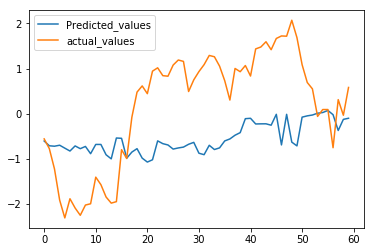

In [13]:
pred.plot()